# ModEM RMS plot

In [ ]:
name_file = r'E:\Varentsov\Codes\_INTERFACE\15-2Dinv-error-plot\3D_script\Modular_NLCG.log'

<IPython.core.display.Javascript object>


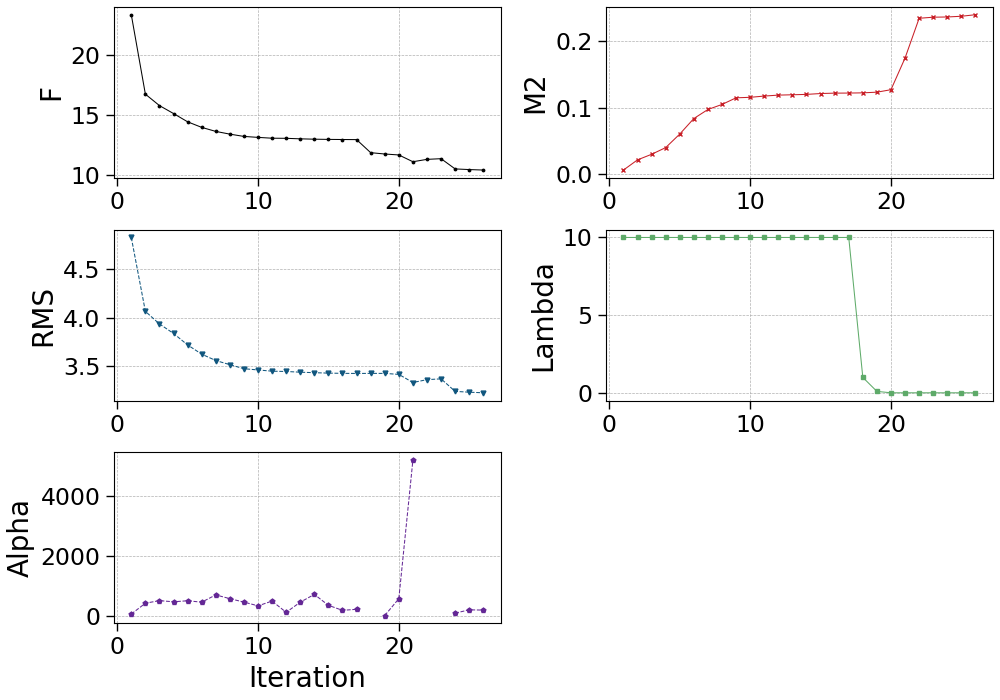

In [17]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# settings

graphsize_x = 10 # xscale of the graph
graphsize_y = 7 # yscale of the graph

rows = 3
columns = 2

xlabelsize = 20 # xlabel font size
ylabelsize = 20 # ylabel font size

ticklabelsize = 17 # tick label  font size
tick_length = 6
minor_tick_length = tick_length * 0.6

alpha01 = 0.99 # graph opacity

linew1 = 0.75 # graph linewidth

markersize01 = 3.5 # size of graph symbol

marker_list = ['.', 'x', 'v', 's', 'p', 'd','*','D','8', 'o', '^', '<', '>', '1', '2']
list_linestyle = ['-','-','dashed','-','dashed','-','dashed','-','dashed','-','dashed','-','dashed','-','dashed','-','dashed','-','dashed']

tight_pad = 0.5 # tight payout pad
 
plt.rcParams['axes.unicode_minus'] = False # just short minus

list_colors = ['k', '#C81D25', '#10567E',  '#5DAA68', '#632695', '#de425b', '#488f31',  '#abac4e', '#3a86ff', '#0D9EDF', '#FCC133', '#0049FF', ]


# CODE
with open(name_file, 'r') as f:
 	data = f.readlines()

iteration, F, m2, rms, Lambda, Alpha = [], [], [], [], [], []

parameters = [F, m2, rms, Lambda, Alpha]
parameters_names = ['F', 'M2', 'RMS', 'Lambda', 'Alpha']

for i in range(len(data)):
    if data[i].find("Completed NLCG iteration") != -1:        
        data[i+1] = data[i+1].replace('*','')        
        iteration.append(int(data[i].split()[3]))       
        F.append(float(data[i+1].split()[1][2:]))
        m2.append(float(data[i+1].split()[2][3:]))
        rms.append(float(data[i+1].split()[4]))
        Lambda.append(float(data[i+1].split()[5][7:]))
        Alpha.append(data[i+1].split()[6][6:])      

for p in parameters:
    for i in range(len(iteration)):
        if p[i]=='':
            p[i]=np.nan
        else:
            p[i]=float(p[i])
          
fig = plt.figure(figsize=(graphsize_x, graphsize_y))

for i in range(len(parameters)):
    fig.add_subplot(rows,columns,int(i+1))
    plt.plot(iteration, parameters[i], linestyle=list_linestyle[i],  color=list_colors[i], marker=marker_list[i], linewidth=linew1, markersize=markersize01, alpha = alpha01)
    plt.ylabel(str(parameters_names[i]), fontsize=ylabelsize)#, weight='bold')
    plt.grid(linestyle='--', linewidth=0.5)
    plt.tick_params(which='major', width=1.0, length=tick_length, labelsize=ticklabelsize)
    plt.tick_params(which='minor', width=1.0, length=minor_tick_length, labelsize=ticklabelsize)
    # plt.yscale('log')
plt.xlabel('Iteration', fontsize=xlabelsize)#, weight='bold')

mng = plt.get_current_fig_manager()
plt.tight_layout(pad=tight_pad, w_pad=1.5, h_pad=1.0)
plt.show()